In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [4]:
path = "./files/titanic.csv"
df = pd.read_csv(path, sep = ',')

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
columns_to_drop = ['Name', "Fare"]
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [8]:
df.columns = ['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [9]:
df.shape

(887, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   Parch     887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB


In [11]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [12]:
df.rename(columns={"Sex_male" : "Sex"}, inplace=True)

In [13]:
df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch"]]


In [14]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0


In [16]:
X = df.drop("Survived", axis=1)
y = df.Survived

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0000)

In [19]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0000)

In [20]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [21]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [23]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.8048387096774193
Test accuracy: 0.7640449438202247


C:\Users\andre\AppData\Local\Temp\ipykernel_5128\552471541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=columns, palette="viridis", saturation=0.5, edgecolor='black', linewidth=2)


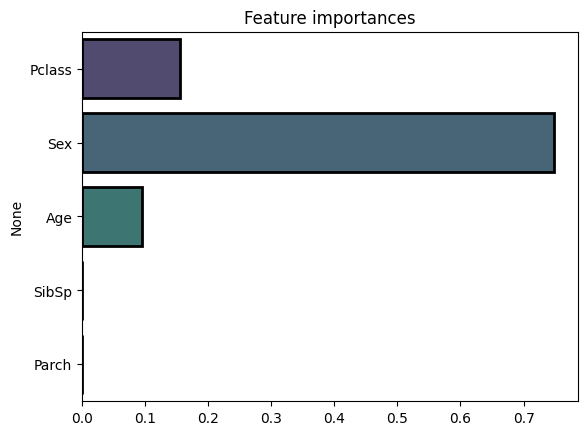

In [26]:
importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=importances, y=columns, palette="viridis", saturation=0.5, edgecolor='black', linewidth=2)
plt.title("Feature importances")
plt.show()